## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [32]:
df = pd.read_csv('RegData.csv', header=None)
df.columns = ['X', 'y']

#### Explore your data

In [33]:
print(df.shape)
df.head()

(13, 2)


,X,y
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       13 non-null     float64
 1   y       13 non-null     float64
dtypes: float64(2)
memory usage: 340.0 bytes


In [35]:
df.describe()

,X,y
count,13.000000,13.000000
mean,5.953846,5.569231
std,1.714942,1.314271
min,2.900000,4.000000
25%,4.900000,4.400000
50%,6.000000,5.200000
75%,6.700000,6.100000
max,9.800000,7.900000


#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [36]:
X = df['X'].values
y = df['y'].values

X.shape, y.shape

((13,), (13,))

#### Explore your data

In [37]:
X.shape, y.shape

((13,), (13,))

In [38]:
print(X)

[2.9000001  6.69999981 4.9000001  7.9000001  9.80000019 6.9000001
 6.0999999  6.19999981 6.         5.0999999  4.69999981 4.4000001
 5.80000019]


In [39]:
print(y)

[4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


#### Plot the original data (scatter plot of X,y)

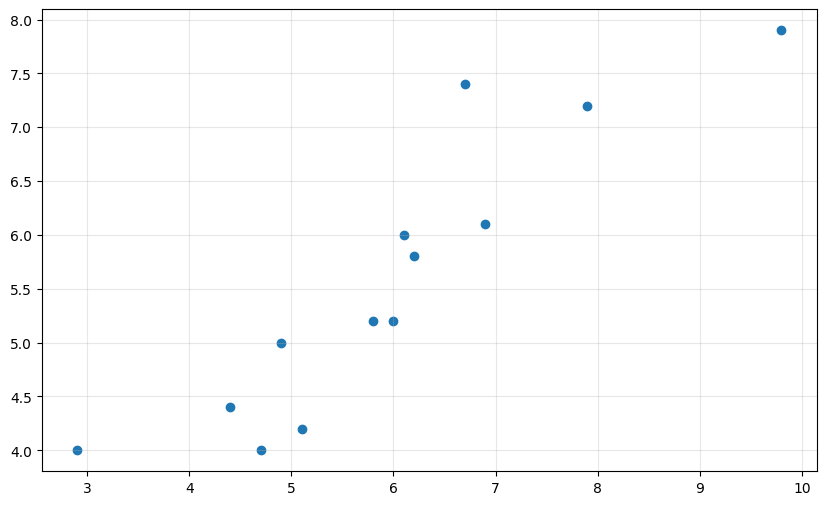

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.grid(True, alpha=0.3)
plt.show()

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

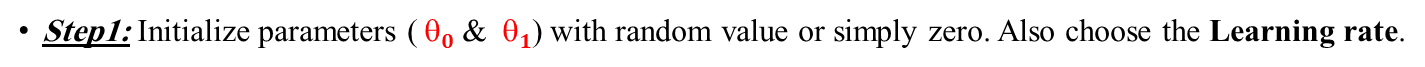

In [41]:
theta_0 = 0
theta_1 = 0
learning_rate = 0.0001

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.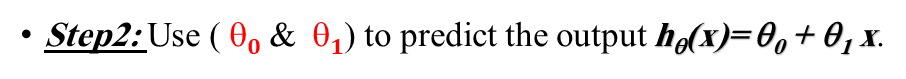
#### Note: you will need to iterate through all data points

In [42]:
def predict(X):
    return theta_0 + theta_1 * X

### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).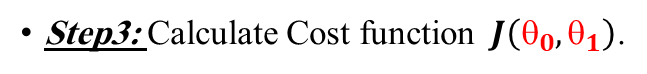
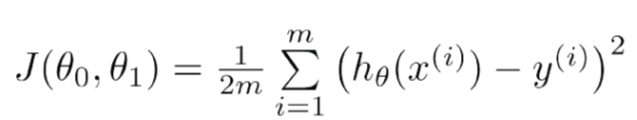

In [43]:
def compute_cost(X, y):
    m = len(y)
    predictions = predict(X)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

### Step4: Calculate the gradient.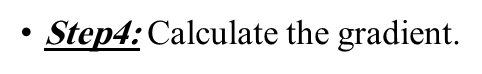
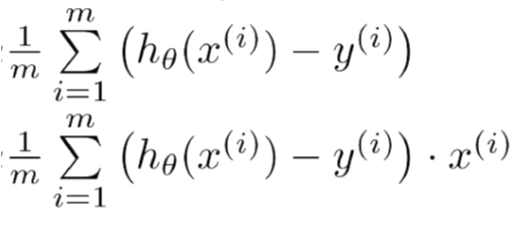

In [44]:
def compute_gradients(X, y):
    m = len(y)
    predictions = predict(X)
    error = predictions - y
    
    gradient_theta_0 = (1 / m) * np.sum(error)
    gradient_theta_1 = (1 / m) * np.sum(error * X)
    
    return gradient_theta_0, gradient_theta_1

### Step5: Update the parameters (simultaneously).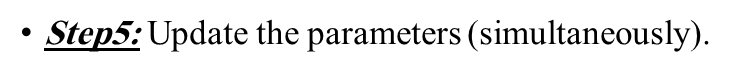
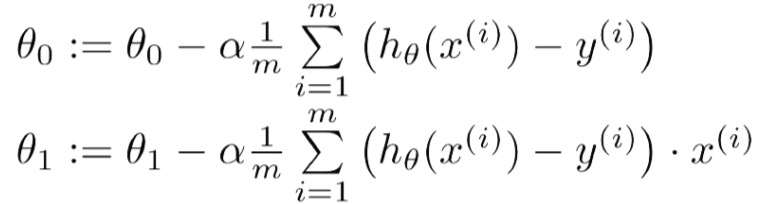

In [45]:
def update(X, y, iterations):
    cost_history = []
    
    for i in range(iterations):
        cost = compute_cost(X, y)
        cost_history.append(cost)
        
        grad_theta_0, grad_theta_1 = compute_gradients(X, y)
        
        theta_0 = theta_0 - learning_rate * grad_theta_0
        theta_1 = theta_1 - learning_rate * grad_theta_1
        
        print(f"Iteration {i}: Cost = {cost:.4f}, theta_0 = {theta_0:.4f}, theta_1 = {theta_1:.4f}")
    
    return theta_0, theta_1, cost_history

### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.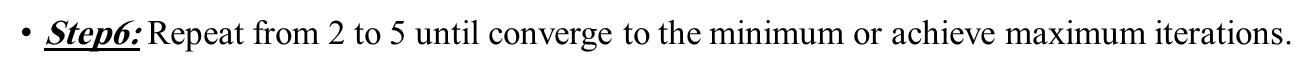

In [46]:
def gradient_descent(X, y, iterations, learning_rate=learning_rate):
    global theta_0
    global theta_1
    cost_history = []
    
    for i in range(iterations):
        cost = compute_cost(X, y)
        cost_history.append(cost)
        
        grad_theta_0, grad_theta_1 = compute_gradients(X, y)
        
        theta_0 = theta_0 - learning_rate * grad_theta_0
        theta_1 = theta_1 - learning_rate * grad_theta_1
        
        print(f"Iteration {i}: Cost = {cost:.4f}, theta_0 = {theta_0:.4f}, theta_1 = {theta_1:.4f}")
    
    return theta_0, theta_1, cost_history

In [47]:
final_theta_0, final_theta_1, cost_history = gradient_descent(X, y, 500, 0.001)

print("\n" + "="*50)
print("Final Results:")
print(f"theta_0 (intercept): {final_theta_0:.4f}")
print(f"theta_1 (slope): {final_theta_1:.4f}")
print(f"Final Cost: {cost_history[-1]:.4f}")

Iteration 0: Cost = 16.3054, theta_0 = 0.0056, theta_1 = 0.0350
Iteration 1: Cost = 15.0709, theta_0 = 0.0109, theta_1 = 0.0687
Iteration 2: Cost = 13.9311, theta_0 = 0.0161, theta_1 = 0.1011
Iteration 3: Cost = 12.8786, theta_0 = 0.0210, theta_1 = 0.1322
Iteration 4: Cost = 11.9068, theta_0 = 0.0258, theta_1 = 0.1620
Iteration 5: Cost = 11.0095, theta_0 = 0.0304, theta_1 = 0.1907
Iteration 6: Cost = 10.1810, theta_0 = 0.0348, theta_1 = 0.2183
Iteration 7: Cost = 9.4160, theta_0 = 0.0390, theta_1 = 0.2448
Iteration 8: Cost = 8.7097, theta_0 = 0.0431, theta_1 = 0.2703
Iteration 9: Cost = 8.0575, theta_0 = 0.0470, theta_1 = 0.2948
Iteration 10: Cost = 7.4553, theta_0 = 0.0508, theta_1 = 0.3183
Iteration 11: Cost = 6.8992, theta_0 = 0.0544, theta_1 = 0.3409
Iteration 12: Cost = 6.3858, theta_0 = 0.0579, theta_1 = 0.3626
Iteration 13: Cost = 5.9118, theta_0 = 0.0612, theta_1 = 0.3835
Iteration 14: Cost = 5.4740, theta_0 = 0.0644, theta_1 = 0.4035
Iteration 15: Cost = 5.0699, theta_0 = 0.06

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [49]:
y_pred = final_theta_0 + final_theta_1 * X

print("predictions:")
print(y_pred)

predictions:
[2.76492882 6.14641736 4.54465976 7.21425618 8.90500066 6.3243907
 5.61249816 5.70148462 5.5235117  4.72263269 4.36668641 4.09972703
 5.34553877]


In [50]:
y

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

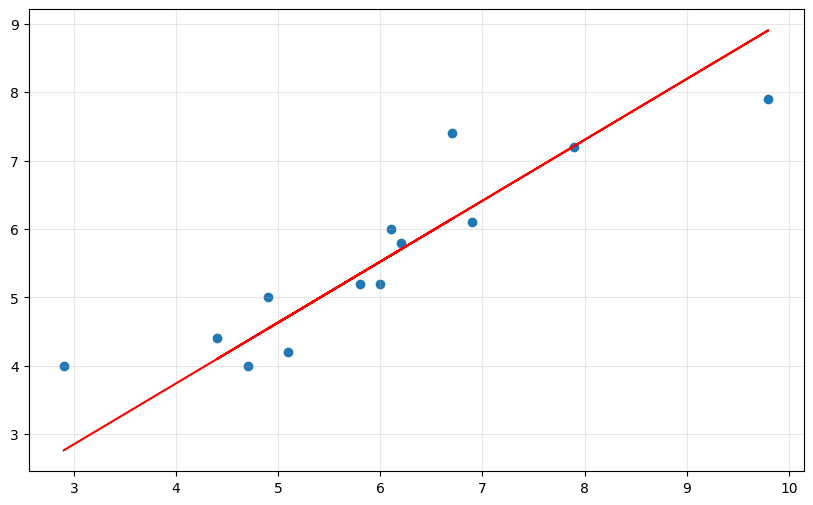

In [51]:
plt.figure(figsize=(10, 6))

plt.scatter(X, y)
plt.plot(X, y_pred, color="red")
plt.grid(True, alpha=0.3)
plt.show()

#### Use R2 score to evaluate LR equation output
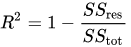
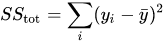
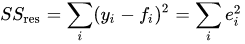
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [52]:
def r2_score(y_true, y_pred):
    y_mean = np.mean(y_true)    
    SS_tot = np.sum((y_true - y_mean) ** 2)
    SS_res = np.sum((y_true - y_pred) ** 2)
    
    r2 = 1 - (SS_res / SS_tot)
    
    return r2

In [53]:
r2 = r2_score(y, y_pred)
print(r2)

0.7516241525816392


## GD vectorize Implementation
### Implement GD without iterate through data points i.e. use vector operations

In [54]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost

In [55]:
def gradient_descent(X, y, theta, iterations, learning_rate=learning_rate):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = X @ theta
        errors = predictions - y
        
        gradients = (1 / m) * (X.T @ errors)
        theta = theta - learning_rate * gradients
        
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        print(
            f"Iteration {i}: Cost = {cost:.4f}, "
            f"theta_0 = {theta[0,0]:.4f}, theta_1 = {theta[1,0]:.4f}"
        )

    return theta, cost_history

#### Plot the output and calculate R2 score
##### Make sure that you obtained the same results

In [60]:
m = len(X)

X_matrix = np.c_[np.ones(m), X]
y = y.reshape(-1, 1)

theta = np.zeros((2, 1))

final_theta, cost_history = gradient_descent(X_matrix, y, theta, 500, 0.001)

print(f"theta_0 (intercept): {final_theta[0,0]:.4f}")
print(f"theta_1 (slope): {final_theta[1,0]:.4f}")
print(f"Cost: {cost_history[-1]:.4f}")

Iteration 0: Cost = 15.0709, theta_0 = 0.0056, theta_1 = 0.0350
Iteration 1: Cost = 13.9311, theta_0 = 0.0109, theta_1 = 0.0687
Iteration 2: Cost = 12.8786, theta_0 = 0.0161, theta_1 = 0.1011
Iteration 3: Cost = 11.9068, theta_0 = 0.0210, theta_1 = 0.1322
Iteration 4: Cost = 11.0095, theta_0 = 0.0258, theta_1 = 0.1620
Iteration 5: Cost = 10.1810, theta_0 = 0.0304, theta_1 = 0.1907
Iteration 6: Cost = 9.4160, theta_0 = 0.0348, theta_1 = 0.2183
Iteration 7: Cost = 8.7097, theta_0 = 0.0390, theta_1 = 0.2448
Iteration 8: Cost = 8.0575, theta_0 = 0.0431, theta_1 = 0.2703
Iteration 9: Cost = 7.4553, theta_0 = 0.0470, theta_1 = 0.2948
Iteration 10: Cost = 6.8992, theta_0 = 0.0508, theta_1 = 0.3183
Iteration 11: Cost = 6.3858, theta_0 = 0.0544, theta_1 = 0.3409
Iteration 12: Cost = 5.9118, theta_0 = 0.0579, theta_1 = 0.3626
Iteration 13: Cost = 5.4740, theta_0 = 0.0612, theta_1 = 0.3835
Iteration 14: Cost = 5.0699, theta_0 = 0.0644, theta_1 = 0.4035
Iteration 15: Cost = 4.6967, theta_0 = 0.067

In [61]:
def r2_score(y_true, y_pred):
    y_mean = np.mean(y_true)    
    SS_tot = np.sum((y_true - y_mean) ** 2)
    SS_res = np.sum((y_true - y_pred) ** 2)
    
    r2 = 1 - (SS_res / SS_tot)
    
    return r2

In [62]:
y_pred = X_matrix @ final_theta

print("Predictions:")
print(y_pred)

Predictions:
[[2.76492882]
 [6.14641736]
 [4.54465976]
 [7.21425618]
 [8.90500066]
 [6.3243907 ]
 [5.61249816]
 [5.70148462]
 [5.5235117 ]
 [4.72263269]
 [4.36668641]
 [4.09972703]
 [5.34553877]]


In [63]:
r2 = r2_score(y, y_pred)
print(r2)

0.7516241525816392


## Plot loss function
### Repeat your last vectorized implementaion version and save loss for each iteration (epoch)

In [64]:
# DONE ALREADY ABOVE

def gradient_descent(X, y, theta, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = X @ theta
        errors = predictions - y
        
        gradients = (1 / m) * (X.T @ errors)
        theta = theta - learning_rate * gradients
        
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        print(
            f"Iteration {i}: Cost = {cost:.4f}, "
            f"theta_0 = {theta[0,0]:.4f}, theta_1 = {theta[1,0]:.4f}"
        )

    return theta, cost_history

### Plot loss vs. iterations

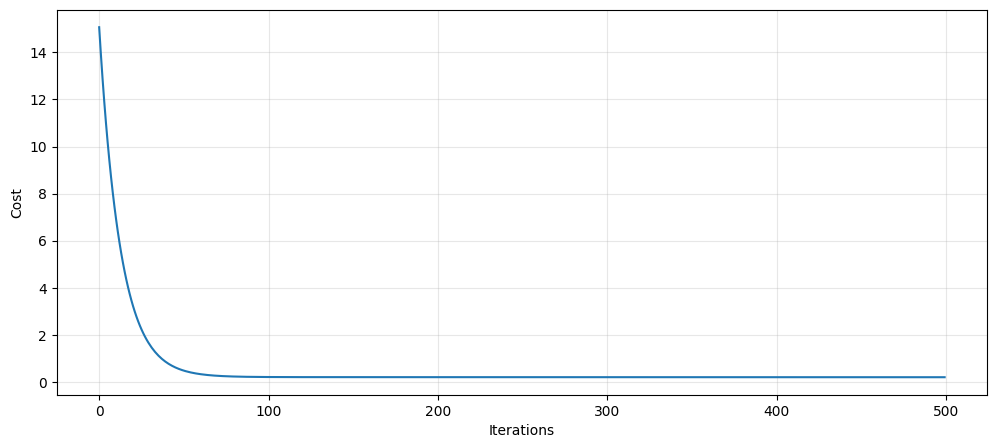

In [65]:
plt.figure(figsize=(12, 5))

plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True, alpha=0.3)
plt.show()

## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [81]:
df = pd.read_csv('MultipleLR.csv', header=None)

df.columns = ['x1', 'x2', 'x3', 'y']

In [82]:
print(df.shape)

(25, 4)


In [83]:
df.head()

,x1,x2,x3,y
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x1      25 non-null     int64
 1   x2      25 non-null     int64
 2   x3      25 non-null     int64
 3   y       25 non-null     int64
dtypes: int64(4)
memory usage: 932.0 bytes


In [85]:
df.describe()

,x1,x2,x3,y
count,25.000000,25.000000,25.000000,25.000000
mean,79.040000,79.480000,81.480000,162.040000
std,12.279658,12.503733,11.765486,24.044195
min,47.000000,46.000000,55.000000,101.000000
25%,73.000000,73.000000,73.000000,148.000000
50%,79.000000,82.000000,85.000000,164.000000
75%,88.000000,89.000000,90.000000,180.000000
max,96.000000,98.000000,100.000000,196.000000


### Repeat your implementation but for more than one variable

In [86]:
X = df[['x1', 'x2', 'x3']].values
y = df['y'].values

In [87]:
def normalize_features(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_norm = (X - mean) / std
    return X_norm

X_norm = normalize_features(X)
X_norm

array([[-0.5020131 ,  0.04244515, -0.56212061],
       [ 1.16028194,  0.69544741,  0.99932553],
       [ 0.82782293,  0.94032326,  0.73908451],
       [ 1.40962619,  1.51170024,  1.60655458],
       [-0.5020131 , -1.10030881, -0.99585565],
       [-2.16430814, -2.73281447, -2.29706076],
       [-0.83447211, -0.44730655, -0.38862659],
       [-2.66299665, -1.91656164, -1.86332573],
       [ 0.66159343, -0.03918014,  0.73908451],
       [-0.00332459, -0.77380768,  0.56559049],
       [-0.83447211, -0.77380768, -0.73561463],
       [-0.75135736, -1.1819341 , -0.64886762],
       [ 1.16028194,  1.26682439,  0.82583151],
       [-0.00332459,  0.04244515, -0.73561463],
       [-0.75135736, -0.52893183, -0.30187959],
       [ 1.16028194,  0.77707269,  1.25956655],
       [-0.08643934, -0.36568127, -1.16934966],
       [ 0.16290491,  0.85869798,  0.99932553],
       [ 0.74470818,  1.02194854,  0.39209647],
       [-0.08643934,  0.287321  , -0.38862659],
       [ 0.24601967,  0.53219685,  0.739

In [88]:
m = len(y)

X_b = np.c_[np.ones(m), X_norm]
X_b

array([[ 1.        , -0.5020131 ,  0.04244515, -0.56212061],
       [ 1.        ,  1.16028194,  0.69544741,  0.99932553],
       [ 1.        ,  0.82782293,  0.94032326,  0.73908451],
       [ 1.        ,  1.40962619,  1.51170024,  1.60655458],
       [ 1.        , -0.5020131 , -1.10030881, -0.99585565],
       [ 1.        , -2.16430814, -2.73281447, -2.29706076],
       [ 1.        , -0.83447211, -0.44730655, -0.38862659],
       [ 1.        , -2.66299665, -1.91656164, -1.86332573],
       [ 1.        ,  0.66159343, -0.03918014,  0.73908451],
       [ 1.        , -0.00332459, -0.77380768,  0.56559049],
       [ 1.        , -0.83447211, -0.77380768, -0.73561463],
       [ 1.        , -0.75135736, -1.1819341 , -0.64886762],
       [ 1.        ,  1.16028194,  1.26682439,  0.82583151],
       [ 1.        , -0.00332459,  0.04244515, -0.73561463],
       [ 1.        , -0.75135736, -0.52893183, -0.30187959],
       [ 1.        ,  1.16028194,  0.77707269,  1.25956655],
       [ 1.        , -0.

In [89]:
def multivariate_gradient_descent(X, y, learning_rate=0.01, max_iterations=1000):
    m = len(y)
    n = X.shape[1]
    
    theta = np.zeros(n)
    
    cost_history = []
    
    for i in range(max_iterations):
        h = np.dot(X, theta)
        
        cost = (1 / (2 * m)) * np.sum((h - y) ** 2)
        cost_history.append(cost)
        
        error = h - y
        gradients = (1 / m) * np.dot(X.T, error)
        
        theta = theta - learning_rate * gradients

        print(f"Iteration {i}: Cost = {cost:.6f}")
    
    return theta, cost_history

In [90]:
theta, cost_history = multivariate_gradient_descent(X_b, y, learning_rate=0.01, max_iterations=500)

Iteration 0: Cost = 13405.980000
Iteration 1: Cost = 13129.920988
Iteration 2: Cost = 12859.866543
Iteration 3: Cost = 12595.669344
Iteration 4: Cost = 12337.186519
Iteration 5: Cost = 12084.279468
Iteration 6: Cost = 11836.813708
Iteration 7: Cost = 11594.658711
Iteration 8: Cost = 11357.687759
Iteration 9: Cost = 11125.777799
Iteration 10: Cost = 10898.809312
Iteration 11: Cost = 10676.666181
Iteration 12: Cost = 10459.235565
Iteration 13: Cost = 10246.407789
Iteration 14: Cost = 10038.076223
Iteration 15: Cost = 9834.137178
Iteration 16: Cost = 9634.489802
Iteration 17: Cost = 9439.035982
Iteration 18: Cost = 9247.680251
Iteration 19: Cost = 9060.329695
Iteration 20: Cost = 8876.893866
Iteration 21: Cost = 8697.284703
Iteration 22: Cost = 8521.416450
Iteration 23: Cost = 8349.205580
Iteration 24: Cost = 8180.570724
Iteration 25: Cost = 8015.432599
Iteration 26: Cost = 7853.713942
Iteration 27: Cost = 7695.339445
Iteration 28: Cost = 7540.235695
Iteration 29: Cost = 7388.331113
Itera

In [91]:
print("Parameters:")
print(f"theta_0 (intercept): {theta[0]:.4f}")
print(f"theta_1 (x1 coef):   {theta[1]:.4f}")
print(f"theta_2 (x2 coef):   {theta[2]:.4f}")
print(f"theta_3 (x3 coef):   {theta[3]:.4f}")
print(f"\nCost: {cost_history[-1]:.4f}")

Parameters:
theta_0 (intercept): 160.9753
theta_1 (x1 coef):   6.7820
theta_2 (x2 coef):   6.9092
theta_3 (x3 coef):   10.6429

Cost: 4.2542


#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [92]:
y_pred = np.dot(X_b, theta)

print("Predictions:")
print(y_pred)
print("Actual Values")
print(y)

Predictions:
[151.88134138 184.28504884 180.95248582 198.07840633 139.36965924
 102.96808339 148.08927488 109.84178202 173.05753567 161.62588302
 142.14047423 140.80757436 186.38632985 153.41699537 149.01223338
 187.61872015 145.41730704 178.64872775 177.2598206  158.23814391
 174.1868502  173.26250635 165.62402848 151.57135544 190.64240551]
Actual Values
[152 185 180 196 142 101 149 115 175 164 141 141 184 152 148 192 147 183
 177 159 177 175 175 149 192]


### Plot loss vs. iterations

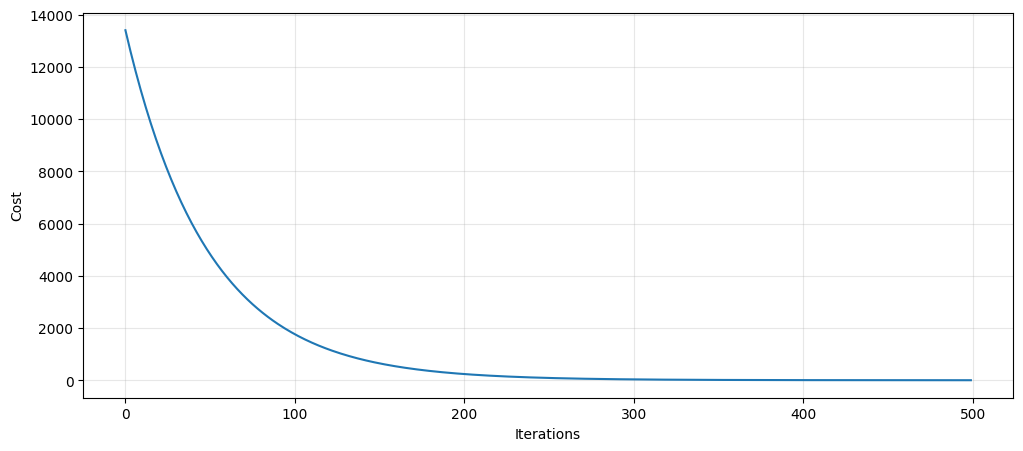

In [93]:
plt.figure(figsize=(12, 5))

plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True, alpha=0.3)

plt.show()

#### Use R2 score to evaluate LR equation output

In [94]:
def r2_score(y_true, y_pred):
    y_mean = np.mean(y_true)
    SS_tot = np.sum((y_true - y_mean) ** 2)
    SS_res = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (SS_res / SS_tot)
    return r2

In [95]:
r2 = r2_score(y, y_pred)

print(f"R2 Score: {r2:.4f}")

R2 Score: 0.9847


# Bonus
## LR Using sklearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [97]:
df = pd.read_csv('RegData.csv', header=None, names=['X', 'y'])

X = df['X'].values.reshape(-1, 1)
y = df['y'].values

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (13, 1)
y shape: (13,)


In [98]:
df.head()

,X,y
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9


#### Train the model (fit the model to the training data)

In [99]:
model = LinearRegression()
model.fit(X, y)

theta_0 = model.intercept_
theta_1 = model.coef_[0]

print(f"theta_0 (intercept): {theta_0:.4f}")
print(f"theta_1 (coefficient): {theta_1:.4f}")

theta_0 (intercept): 1.4341
theta_1 (coefficient): 0.6945


#### Predict y values using the trained model

In [100]:
y_pred = model.predict(X)

print("Predictions:")
print(y_pred)

Predictions:
[3.44824549 6.08745623 4.83730388 6.92089146 8.240497   6.22636227
 5.67073878 5.74019163 5.60128593 4.97620959 4.69839784 4.49003928
 5.46238022]


#### Plot model output (fitted line) with the original data (scatter plot of X,y)

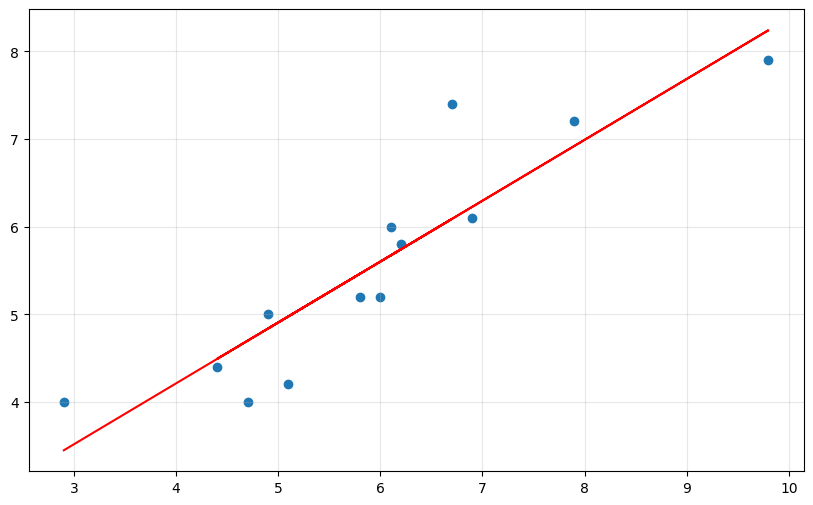

In [101]:
plt.figure(figsize=(10, 6))

plt.scatter(X, y)

plt.plot(X, y_pred, color="red")

plt.grid(True, alpha=0.3)
plt.show()

#### Use R2 score to evaluate model output

In [102]:
r2 = r2_score(y, y_pred)

print(r2)

0.8213156778363777


### Repeat for Mulivariate

In [103]:
df = pd.read_csv('MultipleLR.csv', header=None, names=['x1', 'x2', 'x3', 'y'])

X = df[['x1', 'x2', 'x3']].values
y = df['y'].values

In [104]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

print(df.head())

print(df.describe())

X shape: (25, 3)
y shape: (25,)
   x1  x2   x3    y
0  73  80   75  152
1  93  88   93  185
2  89  91   90  180
3  96  98  100  196
4  73  66   70  142
              x1         x2          x3           y
count  25.000000  25.000000   25.000000   25.000000
mean   79.040000  79.480000   81.480000  162.040000
std    12.279658  12.503733   11.765486   24.044195
min    47.000000  46.000000   55.000000  101.000000
25%    73.000000  73.000000   73.000000  148.000000
50%    79.000000  82.000000   85.000000  164.000000
75%    88.000000  89.000000   90.000000  180.000000
max    96.000000  98.000000  100.000000  196.000000


In [105]:
model = LinearRegression()
model.fit(X, y)

theta_0 = model.intercept_
theta_coefficients = model.coef_

print(f"theta_0 (intercept): {theta_0:.4f}")
print(f"theta_1 (x1 coef):   {theta_coefficients[0]:.4f}")
print(f"theta_2 (x2 coef):   {theta_coefficients[1]:.4f}")
print(f"theta_3 (x3 coef):   {theta_coefficients[2]:.4f}")

theta_0 (intercept): -4.3361
theta_1 (x1 coef):   0.3559
theta_2 (x2 coef):   0.5425
theta_3 (x3 coef):   1.1674


In [106]:
y_pred = model.predict(X)

print("Predictions:")
print(y_pred)

print("Actuals:")
print(y)

Predictions:
[152.60720439 185.08011472 181.78158547 199.74522647 139.1747207
 103.69391793 150.2632274  112.82069728 174.55948394 164.49442094
 143.42337551 142.23416416 186.54285759 152.40794527 151.24409108
 189.12496613 143.50219218 181.89389361 177.29838914 158.34934019
 176.57742415 174.66365778 167.68889392 150.63279846 191.1954116 ]
Actuals:
[152 185 180 196 142 101 149 115 175 164 141 141 184 152 148 192 147 183
 177 159 177 175 175 149 192]


In [107]:
r2 = r2_score(y, y_pred)
print(r2)

0.9896615789448399
